# Assignment 1

Build a machine learning model to accurately classify whether or not the patients in the dataset have diabetes or not? \
_Some details about the dataset:_
- __Pregnancies:__ Number of times pregnant
- __Glucose:__ Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- __BloodPressure:__ Diastolic blood pressure (mm Hg)
- __SkinThickness:__ Triceps skinfold thickness (mm)
- __Insulin:__ 2-Hour serum insulin (mu U/ml)
- __BMI:__ Body mass index (weight in kg/(height in m)^2)
- __DiabetesPedigreeFunction:__ It provided some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient. This measure of genetic influence gives an idea of the hereditary risk one might have with the onset of diabetes mellitus.


## Group Details

- __MT2019122__ Tarang Parikh \
- __MT2019123__ Tarun Kumar Rai \
- __MT2019124__ Tushar Masane \

### Import Libraries
Import the basic libraries to get started

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

### The Data
Load the given Pima_Indian_diabetes.csv file

In [3]:
df = pd.read_csv(r'Pima_Indian_diabetes.csv')

### Check the Data
- Checking what kind of data is given
- Checking the info about different columns in the data
- Checking the statistical description of data

In [4]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 742 non-null float64
Glucose                     752 non-null float64
BloodPressure               768 non-null float64
SkinThickness               746 non-null float64
Insulin                     768 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         749 non-null float64
Outcome                     768 non-null int64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,742.000000,752.000000,768.000000,746.000000,768.000000,757.000000,768.000000,749.000000,768.000000
mean,3.866601,119.966097,68.886078,20.309879,79.799479,31.711151,0.471876,33.761336,0.348958
std,3.479971,32.367659,19.427448,15.974523,115.244002,8.544789,0.331329,12.297409,0.476951
min,-5.412815,0.000000,-3.496455,-11.945520,0.000000,-16.288921,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243750,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Exploratory Data Analysis

### Missing Values
- Using seaborn to create heatmaps to check where values are missing

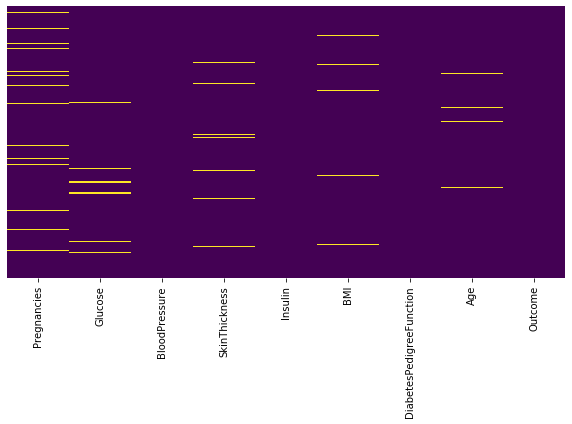

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)
df.isnull().sum()

Pregnancies                  26
Glucose                      21
BloodPressure                 0
SkinThickness               237
Insulin                     374
BMI                          21
DiabetesPedigreeFunction      0
Age                          19
Outcome                       0
dtype: int64

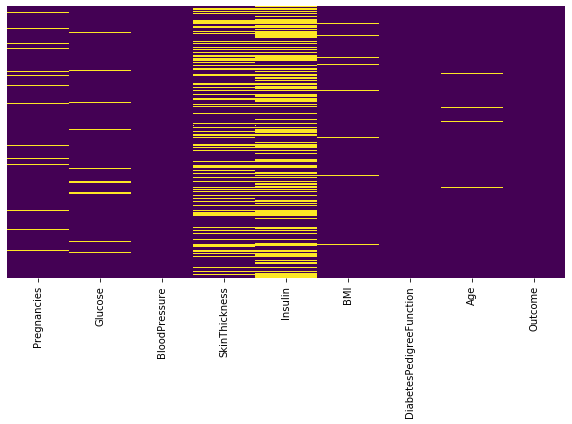

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### Conclusion
- About 4% values are missing in the columns Pregnancies, Glucose, BMI and Age.
- About 35 to 40% values are missing in SkinThickness and Insulin.

__Correlation amongst data__

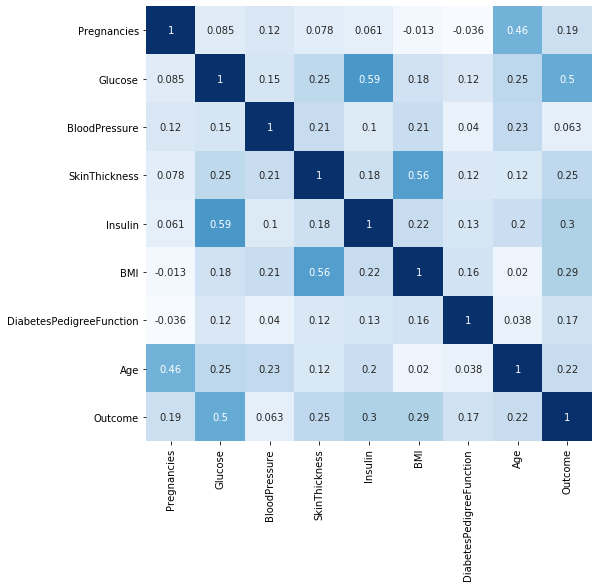

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', cbar=False)

From the above generated heatmap/correlation matrix, the major contributors to the Outcome are:
1. Pregnancies
2. Glucose
3. Insulin
4. BMI
5. DiabetesPedigreeFunction
6. Age

As BloodPressure does not contribute significantly, it can be dropped

__Exploring the columns__

_Generate a distribution plot of Pregnancies_

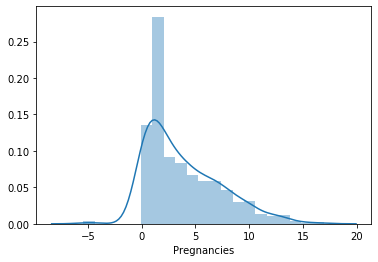

In [11]:
sns.distplot(df['Pregnancies'].dropna())

- The distribution of pregnancies appears normal since the no of pregnancies is maximum for for lower values like 0 to 5 whereas number decreases as it approaches higher values
- The data needs to be cleaned due to presence of negative values which is practically not possible
- The pregnancies are highly correlated with Age as seen from correlation heatmap
- Thus, missing values in Pregnancies can be filled by imputing them from average Pregnancy values depending on Age

_Generate a distribution plot for Glucose_

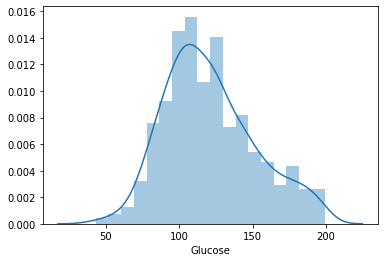

In [12]:
sns.distplot(df['Glucose'].dropna())

- The distribution of Glucose values appears normal as the Glucose levels are in the valid range 
- The data needs to be cleaned for negatives
- Since a very less number of values are missing, they can be imputed with means.

_Generate distribution plot for SkinThickness_

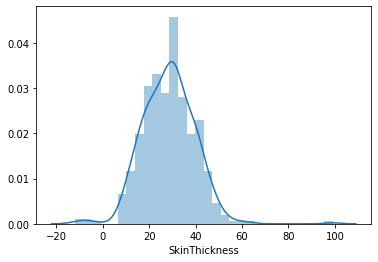

In [13]:
sns.distplot(df['SkinThickness'].dropna())

- The data appears abnormal as large number of datapoints have value 0 which is practically not possible
- The data needs to be cleaned for negatives as well as zero
- From the heatmap, SkinThickness is highly correlated with BMI
- The missing values can be imputed with average SkinThickness based on different BMI levels

_Generate distribution plot for BMI_

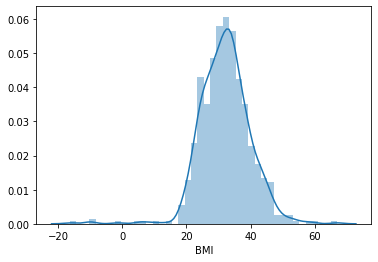

In [14]:
sns.distplot(df['BMI'].dropna())

- The data appears normal as BMI is in valid range
- The data needs to be cleaned for negatives and zero
- Since very less values are missing, it can be imputed with mean value.

_Generate a distributon plot for Insulin_

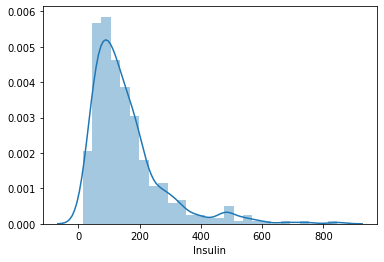

In [15]:
sns.distplot(df['Insulin'].dropna())

- The distribution of Insulin appears normal
- From the above correlation heatmap, there is a high correlation of Insulin with Glucose
- The missing values can be replaced based on different values of Glucose

### Data Cleaning
Filling the missing values and correcting impractical values

__1. Age__ \
The missing values in age are filled with mean Age value

In [16]:
meanAge = int(df.Age.mean())
df['Age'].fillna(meanAge, inplace=True)

__2. Pregnancies__ \
Imputing pregnancy values based on different age groups

In [17]:
age_breakpoints = [20,40,60,100]
age_labels = [1,2,3]
age_group = pd.cut(df['Age'], bins=age_breakpoints, labels=age_labels)

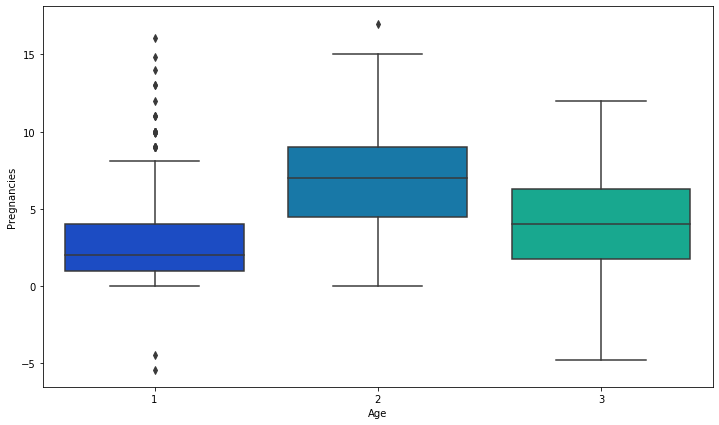

In [18]:
plt.figure(figsize=(12,7))
sns.boxplot(x=age_group, y='Pregnancies', data=df, palette='winter')

From the above boxplot, the average number of pregnancies
- In age_group 1 (Ages 20 to  40) is 2
- In age_group 2 (Ages 40 to  60) is 6
- In age_group 3 (Ages 60 to 100) is 4

In [19]:
def imputePregnancies(cols):
    Pregnancies = cols[0]
    Age = cols[1]
    
    if pd.isnull(Pregnancies):
        if Age == 1:
            return 2
        elif Age == 2:
            return 6
        else:
            return 4
    else:
        return Pregnancies

In [20]:
df['Pregnancies'] = pd.concat([df['Pregnancies'], age_group], axis=1).apply(imputePregnancies,axis=1)

Correcting negatives to be 0

In [21]:
def correctPregnancies(pr):
    if pr < 0:
        return 0
    else:
        return pr

In [22]:
df['Pregnancies'] = df['Pregnancies'].apply(correctPregnancies)

__3. Glucose__ \
Imputing Glucose values with mean

In [23]:
meanGlucose = df.Glucose.mean()
df['Glucose'].fillna(meanGlucose, inplace=True)

Correcting negatives to be mean glucose value

In [24]:
def correctGlucose(gl):
    if gl < 0:
        return meanGlucose
    else:
        return gl

In [25]:
df['Glucose'] = df['Glucose'].apply(correctGlucose)

__4. BMI__ \
Imputing BMI with mean

In [26]:
meanBMI = df.BMI.mean()
df['BMI'].fillna(meanBMI, inplace=True)

In [27]:
def correctBMI(bmi):
    if bmi < 0:
        return meanBMI
    else:
        return bmi

In [28]:
df['BMI'] = df['BMI'].apply(correctBMI)

__5. SkinThickness__ \
Imputing SkinThickness values based on BMI

In [29]:
bmi_levels = [0, 25, 50, 75]
bmi_labels = [1, 2, 3]
bmi_class = pd.cut(df['BMI'], bins= bmi_levels, labels = bmi_labels)

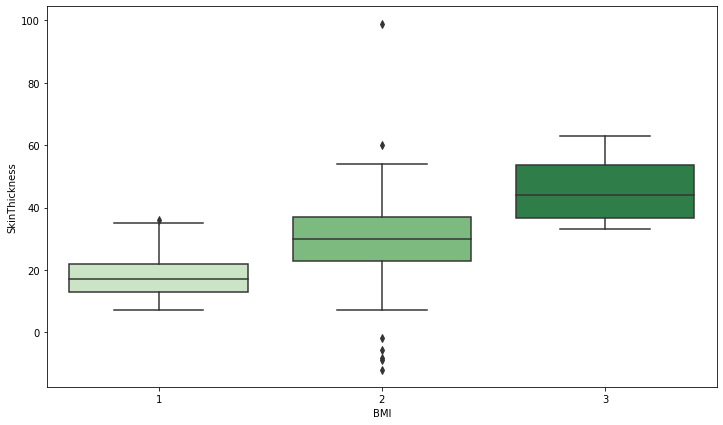

In [30]:
plt.figure(figsize=(12,7))
sns.boxplot(x=bmi_class, y='SkinThickness', data=df, palette='Greens')

From the above boxplot, the average values of SkinThickness 
- In bmi_class 1 (BMI values 0   to 25) is 33
- In bmi_class 2 (BMI values 25  to 50) is 38
- In bmi_class 3 (BMI values 50  to 75) is 40

In [31]:
def imputeSkin(cols):
    Skin = cols[0]
    BMI = cols[1]
    
    if pd.isnull(Skin):
        if BMI == 1:
            return 33
        elif BMI == 2:
            return 38
        else:
            return 40
    else:
        return Skin

In [32]:
df['SkinThickness'] = pd.concat([df['SkinThickness'], bmi_class], axis=1).apply(imputeSkin, axis=1)

Correct negatives with mean SkinThickness

In [33]:
meanSkin = df.SkinThickness.mean()
def correctSkin(sk):
    if sk <= 0:
        return meanSkin
    else:
        return sk

In [34]:
df['SkinThickness'] = df['SkinThickness'].apply(correctSkin)

__6. BloodPressure__ \
Correcting negatives in BloodPressure with mean value

In [35]:
meanBloodPressure = df['BloodPressure'].mean()
def correctBP(bp):
    if bp < 0:
        return meanBloodPressure
    else:
        return bp

In [36]:
df['BloodPressure'] = df['BloodPressure'].apply(correctBP)

__7. Insulin__\
Imputing Insulin values based on Glucose values

In [37]:
glucose_vals = [40, 80, 120, 160, 200]
glucose_lbl = [1, 2, 3, 4]
glucose_class = pd.cut(df['Glucose'], bins = glucose_vals, labels = glucose_lbl)

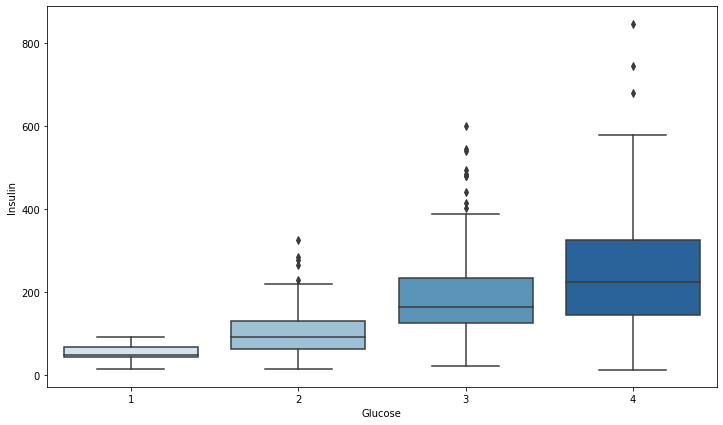

In [38]:
plt.figure(figsize=(12,7))
sns.boxplot(x=glucose_class, y='Insulin', data=df, palette='Blues')

From the above boxplot, the value of Insulin 
- in glucose_class 1 (Glucose values  40 to  80) is 45
- in glucose_class 2 (Glucose values  80 to 120) is 100
- in glucose_class 3 (Glucose values 120 to 160) is 170
- in glucose_class 4 (Glucose values 160 to 200) is 200

In [39]:
def imputeInsulin(cols):
    ins = cols[0]
    glucose = cols[1]
    if pd.isnull(ins):
        if glucose == 1:
            return 45
        elif glucose == 2:
            return 100
        elif glucose == 3:
            return 170
        else:
            return 200
    else:
        return ins

In [40]:
df['Insulin'] = pd.concat([df['Insulin'],glucose_class], axis=1).apply(imputeInsulin, axis=1)

## Checking Data after cleaning
View the data description and visualize the data

In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,170.0,33.600000,0.627,50.0,1
1,1.0,85.0,66.0,29.0,100.0,26.600000,0.351,31.0,0
2,8.0,183.0,64.0,33.0,200.0,23.300000,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,19.179925,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.100000,2.288,33.0,1


In [42]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.838122,120.769083,69.164476,31.384734,143.236979,32.351889,0.471876,33.742501,0.348958
std,3.402841,30.518246,18.906990,9.598283,91.683010,7.035329,0.331329,12.144715,0.476951
min,0.000000,42.974768,0.000000,7.000000,14.000000,5.317899,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,100.000000,27.600000,0.243750,24.000000,0.000000
50%,3.000000,118.000000,72.000000,33.000000,114.000000,32.135665,0.372500,30.000000,0.000000
75%,6.000000,139.000000,80.000000,38.000000,170.000000,36.425000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The data does not have any missing values and is cleaned. \
The data contains numerical values only which is perfect for applying Machine Learning algorithms. \
The machine learning algorithm can now be applied

## Building the model
As we have to predict whether the patients have diabetes or not, this is a classificatkion problem. \
There are only two classes "Yes" or "No" i.e. Binary Classification. \
For Binary Classification, we can use Logistic Regression

### Test and Train Split
We apply test-train split on the data

In [43]:
X = df[df.columns.drop(['Outcome'])]
y = df['Outcome']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training and Predicting

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

In [47]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
predictions = model.predict(X_test)

### Evaluation of Model

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, predictions))

[[134  16]
 [ 36  45]]


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       150
           1       0.74      0.56      0.63        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.74       231
weighted avg       0.77      0.77      0.77       231



### Accuracy 

In [51]:
print("Accuracy = ", accuracy_score(y_test, predictions)*100)

Accuracy =  77.48917748917748
